In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('kaggle_data/new-york-city-taxi-fare-prediction/train.csv', nrows=1000000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [5]:
df_location = df.loc[:, ['fare_amount', 'pickup_longitude', 'pickup_latitude',
                         'dropoff_longitude', 'dropoff_latitude']]
df_location.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4.5,-73.844311,40.721319,-73.841610,40.712278
1,16.9,-74.016048,40.711303,-73.979268,40.782004
2,5.7,-73.982738,40.761270,-73.991242,40.750562
3,7.7,-73.987130,40.733143,-73.991567,40.758092
4,5.3,-73.968095,40.768008,-73.956655,40.783762


In [6]:
df_location.isnull().sum()

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
dtype: int64

In [7]:
df_location = df_location.dropna()

In [8]:
df_location.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64

In [9]:
def outlier_iqr(df, columns=None):
    if columns == None:
        columns = df.columns

    for col in columns:
        q1 = df[col].describe()['25%']
        q3 = df[col].describe()['75%']
        
        iqr = q3 - q1 
        
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5

        df = df[(df[col] >= outlier_min) & (df[col] <= outlier_max)]
        
    return df

In [10]:
df_location = outlier_iqr(df_location, columns=['fare_amount'])
df_location.shape

(913486, 5)

In [11]:
def calculation_distance(x1, y1, x2, y2):
    R = 6371
    
    _x1, _y1, _x2, _y2  = map(np.radians, [x1, y1, x2, y2])
    
    delta_x = _x2 - _x1
    delta_y = _y2 - _y1
    
    a = np.sin(delta_y/2.0) ** 2 + np.cos(_y1) * np.cos(_y2) * np.sin(delta_x/2.0) ** 2
    return 2 * R * np.arcsin(np.sqrt(a))

In [12]:
df_location['distance'] = calculation_distance(
    df_location['pickup_longitude'],
    df_location['pickup_latitude'],
    df_location['dropoff_longitude'],
    df_location['dropoff_latitude']
)
df_location.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999157


In [13]:
def calculation_azimuth(x1, y1, x2, y2):
    _x1, _y1, _x2, _y2 = map(np.radians, [x1, y1, x2, y2])
    
    delta_x = _x2 - _x1
    _y = np.sin(delta_x)
    _x = np.cos(_y1) * np.tan(_y2) - np.sin(_y1) * np.cos(delta_x)

    psi = np.rad2deg(np.arctan2(_y, _x))
    
    return np.where(psi < 0, 360 + psi, psi)

In [14]:
df_location['azimuth'] = calculation_azimuth(
    df_location['pickup_longitude'],
    df_location['pickup_latitude'],
    df_location['dropoff_longitude'],
    df_location['dropoff_latitude']
)
df_location.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,azimuth
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.030764,167.240469
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450134,21.498365
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389525,211.033211
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799270,352.327836
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999157,28.802783


In [15]:
def direction(azimuth, n_ways=8):
    bins = np.linspace(0, 360, n_ways+1)
    _azimuth = azimuth + 180 / n_ways
    _azimuth = np.where(_azimuth >= 360, _azimuth - 360, _azimuth)
    return np.digitize(_azimuth, bins=bins) - 1

df_location['direction'] = direction(df_location['azimuth'])
df_location.head(10)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,azimuth,direction
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.030764,167.240469,4
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450134,21.498365,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389525,211.033211,5
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799270,352.327836,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999157,28.802783,1
5,12.1,-74.000964,40.731630,-73.972892,40.758233,3.787239,38.631713,1
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1.555807,19.610063,0
7,16.5,-73.951300,40.774138,-73.990095,40.751048,4.155444,231.852498,5
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1.253232,64.140893,1
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2.849627,341.237758,0


In [16]:
df_location['direction'].value_counts()

1    195214
5    177755
0    164199
4    139912
3     64387
2     62818
7     56688
6     52513
Name: direction, dtype: int64

In [17]:
def plot_location(x, y, axis):
    plt.scatter(x, y, s=1.0, alpha=0.5)
    plt.axis(axis)

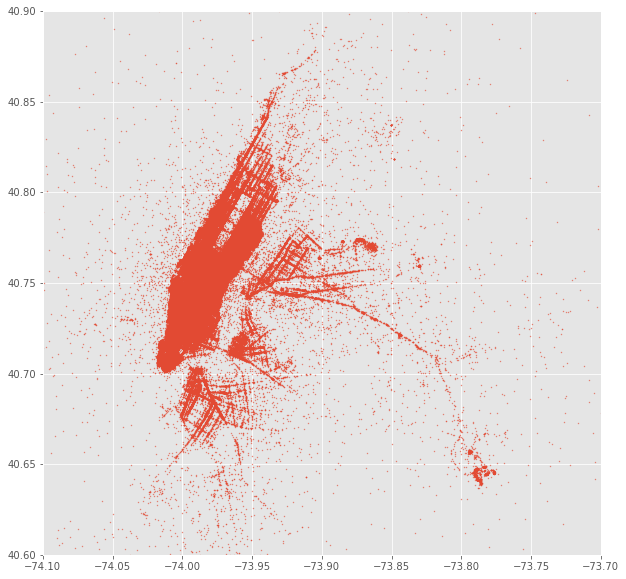

In [18]:
plt.figure(figsize=(10, 10))
plot_location(
    df_location['pickup_longitude'],
    df_location['pickup_latitude'],
    axis=[-74.1, -73.7, 40.6, 40.9]
)

In [19]:
def plot_with_color(x, y, data, axis=None):
    plt.scatter(x, y, s=data, c=data, cmap=plt.get_cmap('jet'), alpha=0.3)
    plt.axis(axis)
    plt.colorbar()

    plt.xlabel('longitude', fontsize=15)
    plt.ylabel('latitude', fontsize=15)

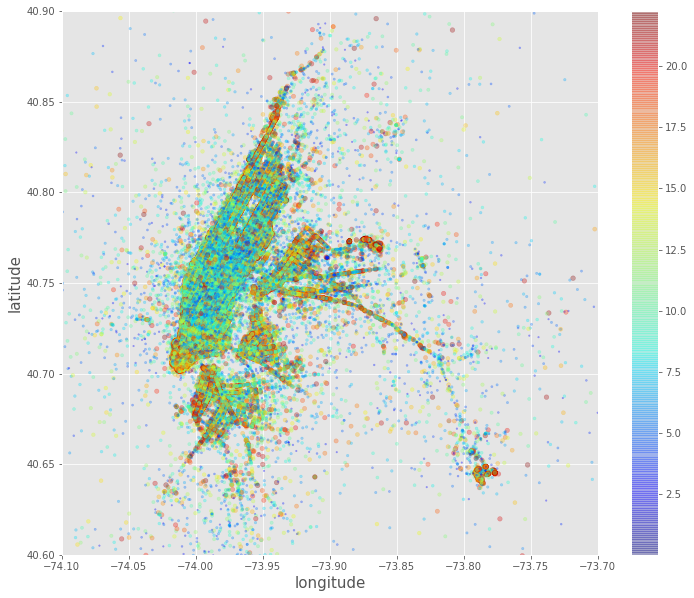

In [20]:
df_location = df_location[(df_location['fare_amount'] > 0) & (df_location['fare_amount'] <= 30)]

plt.figure(figsize=(12, 10))
plot_with_color(
    x=df_location['pickup_longitude'],
    y=df_location['pickup_latitude'],
    data=df_location['fare_amount'],
    axis=[-74.1, -73.7, 40.6, 40.9]
)